# Expert System Application Design for Enhanced Dental Disease Diagnosis 
A dataset (patient medical record) is required to perform this combined method calculation. Due to the limitations of this thesis, there are 6 dental diseases and 28 symptoms. Then data collection was carried out in the form of a dataset of 100 patients who had complaints and diseases according to predetermined symptoms and diagnoses.
The dataset is the CF value of the patient's symptoms and the diagnosis of the disease. With the following explanation:

1. 0.0 -> Not happening
2. 0.25 -> Undecided
3. 0.5 -> Maybe
4. 0.75 -> Most likely
5. 1.0 -> Sure

### Import Library and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# definisiin nama coloumn yg berisikan gejala dan diagnosis.
names = ['GP01','GP02','GP03','GP04','GP05', 'GP06','GP07', 'GP08', 'GP09', 'GP10', 'GP11', 'GP12', 'GP13', 'GP14', 'GP15', 'GP16', 'GP17', 'GP18', 'GP19', 'GP20', 'GP21', 'GP22', 'GP23', 'GP24', 'GP25','GP26','GP27','GP28', 'Diagnosis']

# Baca Dataset ke pandas dataframe
Dataset= pd.read_excel('rm1.xls', names = names)
Dataset

,GP01,GP02,GP03,GP04,GP05,GP06,GP07,GP08,GP09,GP10,...,GP20,GP21,GP22,GP23,GP24,GP25,GP26,GP27,GP28,Diagnosis
0,0.5,0.75,0.5,0.00,0.0,0.0,0.0,0.75,0.50,0.00,...,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,Gingivitis
1,0.0,0.00,0.0,0.75,0.0,1.0,0.0,0.50,0.75,0.00,...,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,Gingivitis
2,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.50,0.75,...,0.0,0.75,0.00,1.00,0.0,0.0,0.00,0.0,0.00,Karies Gigi
3,0.0,0.75,0.0,0.00,0.5,0.0,0.0,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.0,0.0,0.00,1.0,0.00,Periodontitis
4,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1.00,0.25,0.00,...,0.0,0.00,0.00,0.75,0.0,0.0,0.00,0.0,0.00,Karies Gigi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,...,0.0,0.00,0.25,0.00,0.0,0.0,0.00,0.0,0.00,Pulpitis
96,0.5,1.00,0.0,0.75,0.0,1.0,0.0,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.0,0.0,0.00,1.0,0.00,Periodontitis
97,0.0,0.00,0.0,0.75,1.0,1.0,0.0,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.5,0.0,0.25,0.0,0.00,Abses gigi
98,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.75,0.75,...,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,Karies Gigi


### Data Visualization and Analysis

In [4]:
Dataset.shape

(100, 29)

In [5]:
Dataset['Diagnosis'].value_counts()

Diagnosis
Gingivitis       17
Karies Gigi      17
Periodontitis    17
Abses gigi       17
Pulpitis         16
Stomatitis       16
Name: count, dtype: int64

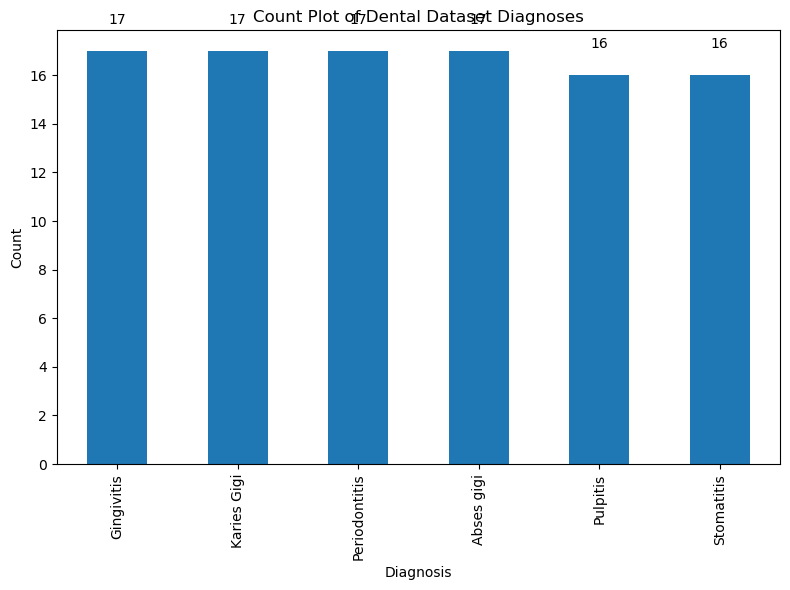

In [6]:
# Count the occurrences of each diagnosis
diagnosis_counts = Dataset['Diagnosis'].value_counts()

# Create a count plot
plt.figure(figsize=(8, 6))
ax = diagnosis_counts.plot(kind='bar')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Count Plot of Dental Dataset Diagnoses')
for i, count in enumerate(diagnosis_counts):
    ax.text(i, count + 1, str(count), ha='center', va='bottom')
plt.tight_layout()
plt.show()


In [7]:
Dataset.columns

Index(['GP01', 'GP02', 'GP03', 'GP04', 'GP05', 'GP06', 'GP07', 'GP08', 'GP09',
       'GP10', 'GP11', 'GP12', 'GP13', 'GP14', 'GP15', 'GP16', 'GP17', 'GP18',
       'GP19', 'GP20', 'GP21', 'GP22', 'GP23', 'GP24', 'GP25', 'GP26', 'GP27',
       'GP28', 'Diagnosis'],
      dtype='object')

In [8]:
Dataset.values

array([[0.5, 0.75, 0.5, ..., 0.0, 0.0, 'Gingivitis'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'Gingivitis'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'Karies Gigi'],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'Abses gigi'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'Karies Gigi'],
       [0.0, 1.0, 0.0, ..., 0.0, 0.75, 'Gingivitis']], dtype=object)

In [9]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GP01       100 non-null    float64
 1   GP02       100 non-null    float64
 2   GP03       100 non-null    float64
 3   GP04       100 non-null    float64
 4   GP05       100 non-null    float64
 5   GP06       100 non-null    float64
 6   GP07       100 non-null    float64
 7   GP08       100 non-null    float64
 8   GP09       100 non-null    float64
 9   GP10       100 non-null    float64
 10  GP11       100 non-null    float64
 11  GP12       100 non-null    float64
 12  GP13       100 non-null    float64
 13  GP14       100 non-null    float64
 14  GP15       100 non-null    float64
 15  GP16       100 non-null    float64
 16  GP17       100 non-null    float64
 17  GP18       100 non-null    float64
 18  GP19       100 non-null    float64
 19  GP20       100 non-null    float64
 20  GP21       

In [10]:
Dataset.describe(include='all')

,GP01,GP02,GP03,GP04,GP05,GP06,GP07,GP08,GP09,GP10,...,GP20,GP21,GP22,GP23,GP24,GP25,GP26,GP27,GP28,Diagnosis
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gingivitis
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
mean,0.185000,0.087500,0.042500,0.300000,0.152500,0.155000,0.035000,0.050000,0.095000,0.070000,...,0.062500,0.072500,0.147500,0.082500,0.105000,0.062500,0.080000,0.162500,0.03000,NaN
std,0.334506,0.244575,0.159129,0.351763,0.311592,0.323296,0.146594,0.177667,0.250706,0.222134,...,0.217234,0.233806,0.309967,0.222063,0.275653,0.211342,0.227192,0.335927,0.12949,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN
75%,0.250000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN


In [11]:
X=Dataset.iloc[:,:28]
X.head()

,GP01,GP02,GP03,GP04,GP05,GP06,GP07,GP08,GP09,GP10,...,GP19,GP20,GP21,GP22,GP23,GP24,GP25,GP26,GP27,GP28
0,0.5,0.75,0.5,0.00,0.0,0.0,0.0,0.75,0.50,0.00,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00,0.0,0.75,0.0,1.0,0.0,0.50,0.75,0.00,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.50,0.75,...,0.0,0.0,0.75,0.0,1.00,0.0,0.0,0.0,0.0,0.0
3,0.0,0.75,0.0,0.00,0.5,0.0,0.0,0.00,0.00,0.00,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1.0,0.0
4,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1.00,0.25,0.00,...,0.0,0.0,0.00,0.0,0.75,0.0,0.0,0.0,0.0,0.0


In [13]:
y=Dataset.iloc[:,-1]
y

0        Gingivitis
1        Gingivitis
2       Karies Gigi
3     Periodontitis
4       Karies Gigi
          ...      
95         Pulpitis
96    Periodontitis
97       Abses gigi
98      Karies Gigi
99       Gingivitis
Name: Diagnosis, Length: 100, dtype: object

### Data Normalization

In [14]:
X = preprocessing.MinMaxScaler().fit_transform(X) #Min Max Normalization
X

array([[0.5 , 0.75, 0.5 , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 1.  ]])

### Train Test Split

In [15]:
#split data training dan data testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state= 1)

### Training and Predicting

In [16]:
knnmodel=KNeighborsClassifier(n_neighbors=6,metric='euclidean')

In [17]:
knnmodel.fit(X_train,y_train) 

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [18]:
y_predict1=knnmodel.predict(X_test)

### Output Visualization

In [19]:
prediction_output=pd.DataFrame(data=[y_predict1,y_test.values],index=['Predicted Output','Actual Output'])

In [20]:
prediction_output.iloc[0,:].value_counts()

Predicted Output
Periodontitis    6
Stomatitis       4
Karies Gigi      4
Pulpitis         3
Abses gigi       2
Gingivitis       1
Name: count, dtype: int64

In [21]:
prediction_output.transpose()

,Predicted Output,Actual Output
0,Periodontitis,Periodontitis
1,Periodontitis,Periodontitis
2,Abses gigi,Abses gigi
3,Periodontitis,Periodontitis
4,Pulpitis,Pulpitis
5,Pulpitis,Abses gigi
6,Periodontitis,Periodontitis
7,Periodontitis,Periodontitis
8,Stomatitis,Stomatitis
9,Stomatitis,Stomatitis


### Accuracy

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
acc=accuracy_score(y_test,y_predict1)*100
print("KNeighborsClassifier:",acc)

KNeighborsClassifier: 90.0


### Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm=confusion_matrix(y_test.values,y_predict1)
cr=classification_report(y_test.values,y_predict1)
cm1=pd.DataFrame(data=cm,index=['Pulpitis',  'Stomatitis',  'Periodontitis', 'Karies Gigi', 'Abses gigi', 'Gingivitis'],columns=['Pulpitis',  'Stomatitis',  'Periodontitis', 'Karies Gigi', 'Abses gigi', 'Gingivitis'])
cm1

,Pulpitis,Stomatitis,Periodontitis,Karies Gigi,Abses gigi,Gingivitis
Pulpitis,2,0,0,0,1,0
Stomatitis,0,1,0,0,0,0
Periodontitis,0,0,3,0,0,0
Karies Gigi,0,0,0,6,0,0
Abses gigi,0,0,0,0,2,0
Gingivitis,0,0,1,0,0,4


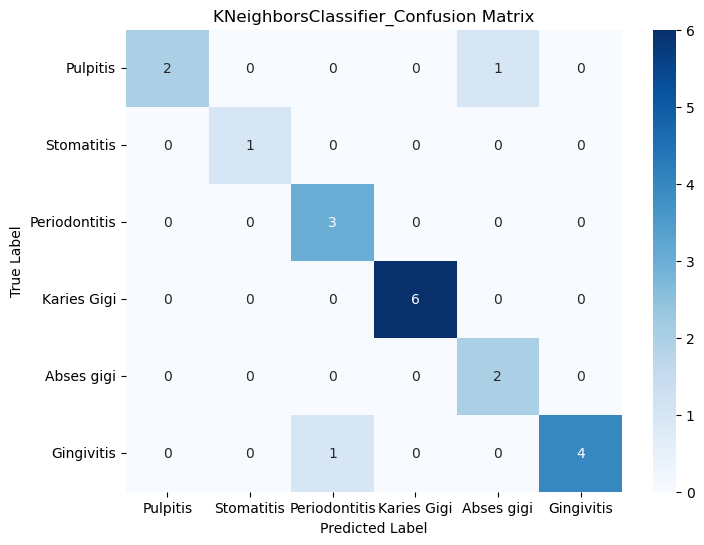

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title('KNeighborsClassifier_Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [26]:
print('\n\nclassification report: \n\n',cr)



classification report: 

                precision    recall  f1-score   support

   Abses gigi       1.00      0.67      0.80         3
   Gingivitis       1.00      1.00      1.00         1
  Karies Gigi       0.75      1.00      0.86         3
Periodontitis       1.00      1.00      1.00         6
     Pulpitis       0.67      1.00      0.80         2
   Stomatitis       1.00      0.80      0.89         5

     accuracy                           0.90        20
    macro avg       0.90      0.91      0.89        20
 weighted avg       0.93      0.90      0.90        20



In [27]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dr = DecisionTreeClassifier()
dr.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
y_pred = dr.predict(X_test)
y_pred

array(['Periodontitis', 'Periodontitis', 'Stomatitis', 'Periodontitis',
       'Pulpitis', 'Abses gigi', 'Periodontitis', 'Periodontitis',
       'Stomatitis', 'Stomatitis', 'Pulpitis', 'Stomatitis',
       'Karies Gigi', 'Abses gigi', 'Gingivitis', 'Pulpitis',
       'Karies Gigi', 'Stomatitis', 'Periodontitis', 'Gingivitis'],
      dtype=object)

In [33]:
acc1=accuracy_score(y_test,y_pred)*100
print("DecisionTreeClassifier:",acc1)

DecisionTreeClassifier: 75.0


In [47]:
cm3=confusion_matrix(y_test.values,y_pred)
cr1=classification_report(y_test.values,y_pred)
cm2=pd.DataFrame(data=cm3,index=['Pulpitis',  'Stomatitis',  'Periodontitis', 'Karies Gigi', 'Abses gigi', 'Gingivitis'],columns=['Pulpitis',  'Stomatitis',  'Periodontitis', 'Karies Gigi', 'Abses gigi', 'Gingivitis'])
cm2

,Pulpitis,Stomatitis,Periodontitis,Karies Gigi,Abses gigi,Gingivitis
Pulpitis,1,0,0,0,1,1
Stomatitis,0,1,0,0,0,0
Periodontitis,1,1,1,0,0,0
Karies Gigi,0,0,0,6,0,0
Abses gigi,0,0,0,0,2,0
Gingivitis,0,0,1,0,0,4


In [48]:
print('\n\nclassification report: \n\n',cr1)



classification report: 

                precision    recall  f1-score   support

   Abses gigi       0.50      0.33      0.40         3
   Gingivitis       0.50      1.00      0.67         1
  Karies Gigi       0.50      0.33      0.40         3
Periodontitis       1.00      1.00      1.00         6
     Pulpitis       0.67      1.00      0.80         2
   Stomatitis       0.80      0.80      0.80         5

     accuracy                           0.75        20
    macro avg       0.66      0.74      0.68        20
 weighted avg       0.74      0.75      0.73        20



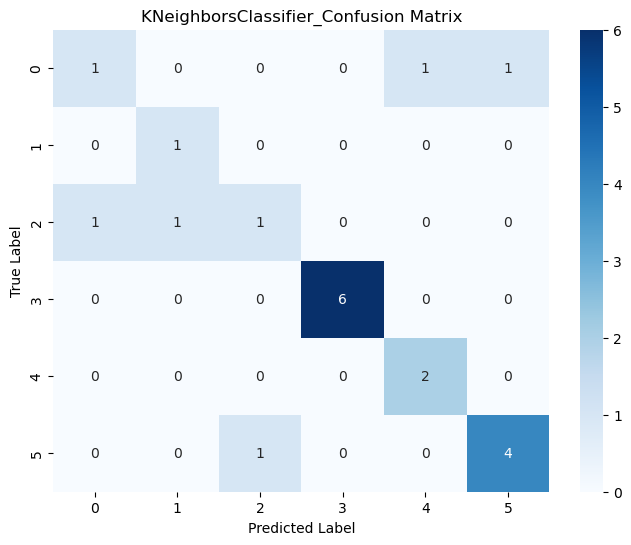

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues')
plt.title('KNeighborsClassifier_Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()